# Laboratory 3

In [1]:
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt
import scipy
def load():
    return sklearn.datasets.load_iris()['data'].T, sklearn.datasets.load_iris()['target']

def to_col(row):
    return row.reshape(row.size, 1)

In [2]:
D,labels = load() # load dataset and labels

In [3]:
mu = D.mean() # mean of all the elements of the dataset, sum of D[i,j]/D.size
mu

3.4644999999999997

In [4]:
mu = D.mean(axis=1) # mean of all the columns of the dataset
# it is a row vector, i have to reshape it to a column vector
mu = to_col(mu)
mu

array([[5.84333333],
       [3.05733333],
       [3.758     ],
       [1.19933333]])

In [5]:
D_centered = D - mu
N = np.shape(D)[1] #150
C = 1/N * np.dot(D_centered, D_centered.T)
print('C = ',C)
print('mu = ',mu)

C =  [[ 0.68112222 -0.04215111  1.26582     0.51282889]
 [-0.04215111  0.18871289 -0.32745867 -0.12082844]
 [ 1.26582    -0.32745867  3.09550267  1.286972  ]
 [ 0.51282889 -0.12082844  1.286972    0.57713289]]
mu =  [[5.84333333]
 [3.05733333]
 [3.758     ]
 [1.19933333]]


In [6]:
s, U = np.linalg.eigh(C) # compute eigenvalues and eigenvectors of C
print('s = ',s) # s are sorted from the smallest to the largest
print('U = ',U) # U is made by row vectors that are the eigenvectors of C

s =  [0.02367619 0.0776881  0.24105294 4.20005343]
U =  [[ 0.31548719  0.58202985  0.65658877 -0.36138659]
 [-0.3197231  -0.59791083  0.73016143  0.08452251]
 [-0.47983899 -0.07623608 -0.17337266 -0.85667061]
 [ 0.75365743 -0.54583143 -0.07548102 -0.3582892 ]]


In [7]:
m = 2
P = U[:, ::-1][:, 0:m]
P

array([[-0.36138659,  0.65658877],
       [ 0.08452251,  0.73016143],
       [-0.85667061, -0.17337266],
       [-0.3582892 , -0.07548102]])

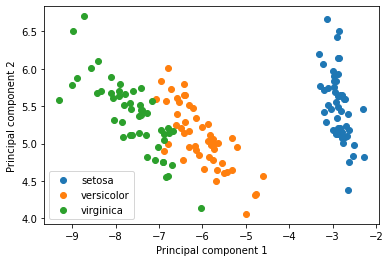

In [8]:
y = np.dot(P.T, D)
setosa = y[:,labels == 0]
versicolor = y[:,labels == 1]
virginica = y[:,labels == 2]
plt.scatter(setosa[0,:], setosa[1,:])
plt.scatter(versicolor[0,:], versicolor[1,:])
plt.scatter(virginica[0,:], virginica[1,:])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.legend(['setosa','versicolor','virginica'])
plt.show()

In [9]:
# given a dataset X and the parameter m it computes the projection matrix P
def projection_PCA(X,m):
    mu = D.mean(axis = 1).reshape(-1,1)
    Xc = X - mu
    K = np.shape(X)[1] # number of columns of X
    C = 1/K * np.dot(Xc, Xc.T) # covariance matrix
    sigma, U = np.linalg.eigh(C)
    P = U[:, ::-1][:, 0:m] # take the m eigenvectos of C associated to the m highest eigenvalues
    return P

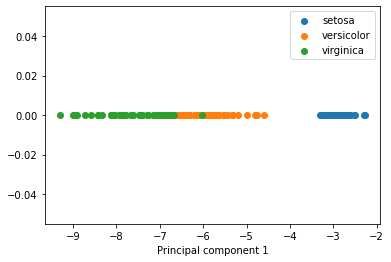

In [10]:
P = projection_PCA(D,1)
y = np.dot(P.T, D)
setosa = y[:,labels == 0]
versicolor = y[:,labels == 1]
virginica = y[:,labels == 2]
setosa
plt.scatter(setosa[0,:],np.zeros((1,np.shape(setosa)[1])))
plt.scatter(versicolor[0,:],np.zeros((1,np.shape(versicolor)[1])))
plt.scatter(virginica[0,:],np.zeros((1,np.shape(virginica)[1])))
plt.xlabel('Principal component 1')
plt.legend(['setosa','versicolor','virginica'])
plt.show()

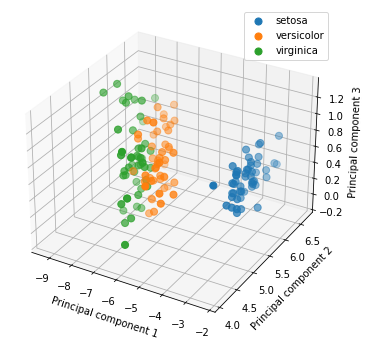

In [11]:
P = projection_PCA(D,3)
y = np.dot(P.T, D)
setosa = y[:,labels == 0]
versicolor = y[:,labels == 1]
virginica = y[:,labels == 2]
fig = plt.figure()
fig.set_size_inches(6,6)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(setosa[0,:],setosa[1,:],setosa[2,:],s=50*np.ones((1,50)))
ax.scatter(versicolor[0,:],versicolor[1,:],versicolor[2,:],s=50*np.ones((1,50)))
ax.scatter(virginica[0,:],virginica[1,:],virginica[2,:],s=50*np.ones((1,50)))
ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
ax.set_zlabel('Principal component 3')
ax.legend(['setosa','versicolor','virginica'])

## LDA - Linear Discriminant Analysis

First we have to compute Sb and Sw

In [12]:
setosa = D[:,labels == 0]
versicolor = D[:,labels == 1]
virginica = D[:,labels == 2]
mu_setosa = np.mean(setosa, axis=1)
mu_versicolor = np.mean(versicolor, axis=1)
mu_virginica = np.mean(virginica, axis=1)

In [15]:
Mc = to_col(mu_setosa) - mu
Mc = np.array([mu_setosa,mu_versicolor,mu_virginica]).T
Mc = Mc - mu
Mc # one class mean for each column - mu
nc = np.array([np.sum(labels==i) for i in set(labels)]) # number of samples for each class

In [97]:
Sb = 0
for i in range(3): #once for each class label
    Sb += nc[i] * np.dot(Mc[:,i:i+1], Mc[:,i:i+1].T)
Sb /= sum(nc)

array([[ 0.42141422, -0.13301778,  1.101656  ,  0.47519556],
       [-0.13301778,  0.07563289, -0.38159733, -0.15288444],
       [ 1.101656  , -0.38159733,  2.91401867,  1.24516   ],
       [ 0.47519556, -0.15288444,  1.24516   ,  0.53608889]])

In [131]:
Swc = 0
Sw = 0
for i in range(3):
    c = D[:,labels == i] # in c there are all the samples of class i
    mu_c = to_col(np.mean(c, axis=1)) # mean of samples of class i
    c -= mu_c # center the samples of class i by subtracting the mean of the class
    Swc = 1/nc[i] * np.dot(c, c.T) # inner summary
    Sw += nc[i] * Swc # outer summary
Sw /= sum(nc)

array([[0.259708  , 0.09086667, 0.164164  , 0.03763333],
       [0.09086667, 0.11308   , 0.05413867, 0.032056  ],
       [0.164164  , 0.05413867, 0.181484  , 0.041812  ],
       [0.03763333, 0.032056  , 0.041812  , 0.041044  ]])

In [132]:
print('Sb=%s\nSw=%s'%(Sb,Sw))

Sb=[[ 0.42141422 -0.13301778  1.101656    0.47519556]
 [-0.13301778  0.07563289 -0.38159733 -0.15288444]
 [ 1.101656   -0.38159733  2.91401867  1.24516   ]
 [ 0.47519556 -0.15288444  1.24516     0.53608889]]
Sw=[[0.259708   0.09086667 0.164164   0.03763333]
 [0.09086667 0.11308    0.05413867 0.032056  ]
 [0.164164   0.05413867 0.181484   0.041812  ]
 [0.03763333 0.032056   0.041812   0.041044  ]]


Using the generalized eigenvalue problem

In [136]:
s, U = scipy.linalg.eigh(Sb, Sw)
W = U[:, ::-1][:, 0:m]
W # its column are not necessarily othogonal

array([[ 0.83779794,  0.02434685],
       [ 1.55005187,  2.18649663],
       [-2.22355955, -0.94138258],
       [-2.83899363,  2.86801283]])

In [138]:
UW, _, _ = np.linalg.svd(W)
U = UW[:, 0:m]
U # its columns are orthogonal (basis of W)

array([[-0.16188578, -0.13894884],
       [-0.01900807, -0.76893743],
       [ 0.31480747,  0.57834653],
       [ 0.93505505, -0.23440081]])

Solving the eigenvalue problem by joint diagonalization of Sb and Sw

In [151]:
U,s,_ = np.linalg.svd(Sw)

In [159]:
sigma = 1/s**0.5

In [160]:
sigma

array([1.5167286 , 3.44092637, 4.29357363, 6.75483733])

In [168]:
P1 = np.dot(np.dot(U,np.diag(sigma)), U.T)

In [170]:
Sbt = np.dot(np.dot(P1,Sb),P1.T)

In [175]:
s, P2 = np.linalg.eigh(Sbt)
P2 = U[:, ::-1][:, 0:m]

In [176]:
W1 = np.dot(P1.T,P2)

In [177]:
W1

array([[-0.83779794,  0.02434685],
       [-1.55005187,  2.18649663],
       [ 2.22355955, -0.94138258],
       [ 2.83899363,  2.86801283]])

In [178]:
UW1, _, _ = np.linalg.svd(W1)
U1 = UW1[:, 0:m]
U1 # its columns are orthogonal (basis of W1)

array([[-0.16188578, -0.13894884],
       [-0.01900807, -0.76893743],
       [ 0.31480747,  0.57834653],
       [ 0.93505505, -0.23440081]])